## EDA and Visualizations

**Name**: Diane Lu

**Contact**: dianengalu@gmail.com

**Date**: 07/18/2023

### Table of Contents 

1. [Introduction](#intro)
2. [Business Dataset](#business)
    * Data Dictionary
    * Restaurant Ratings Distribution
    * Top 10 Cities 
    * Top 10 Restaurant Categories
3. [Review Dataset](#review)
    * Data Dictionary
4. [User Dataset](#user)
    * Data Dictionary

### Introduction <a class="anchor" id="intro"></a>

asdf

#### Importing Python Libraries 

Importing necessary libraries for the EDA process.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Business Data Exploratory Analysis <a class="anchor" id="business"></a>

**Overview**:



**Data Dictionary:**
* `business_id`: unique business id
* `restaurant_name`: the restaurant's name
* `address`: the full address of the restaurant
* `city`: the city
* `state`: 2 character state code
* `postal_code`: the postal code
* `latitude`: latitude of the restaurant
* `longitude`: longitude of the restaurant
* `restaurant_rating`: star rating
* `review_count`: number of reviews
* `is_open`: 0 or 1 for closed or open
* `categories`: business categories

In [2]:
# Load the pickled DataFrame
business_data = pd.read_pickle('C:/Users/Diane/Desktop/brainstation_capstone/yelp_data/business_data.pkl')

In [3]:
# Print a concise summary of a DataFrame
business_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50764 entries, 0 to 160584
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   business_id              50764 non-null  object 
 1   restaurant_name          50764 non-null  object 
 2   address                  50764 non-null  object 
 3   city                     50764 non-null  object 
 4   state                    50764 non-null  object 
 5   postal_code              50764 non-null  object 
 6   latitude                 50764 non-null  float64
 7   longitude                50764 non-null  float64
 8   restaurant_rating        50764 non-null  float64
 9   restaurant_review_count  50764 non-null  int64  
 10  is_open                  50764 non-null  int64  
 11  categories               50764 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 5.0+ MB


In [4]:
# Displaying the first few rows to get an initial glimpse of the data
business_data.head()

,business_id,restaurant_name,address,city,state,postal_code,latitude,longitude,restaurant_rating,restaurant_review_count,is_open,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"[Gastropubs, Beer Gardens, Bars, American (Tra..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"[Salad, Soup, Sandwiches, Delis, Cafes, Vegeta..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,[Thai]
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,[Breakfast & Brunch]
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,[Pizza]


In [5]:
print(f"The number of unique restaurants in our dataset is {business_data['restaurant_name'].nunique()}.")

The number of unique restaurants in our dataset is 37338.


Transforming `restaurant_rating` from float to int so that we can properly visualize the distribution of restaurant ratings. 

In [6]:
rounded_restaurant_rating = round(business_data['restaurant_rating'] + 0.01)

In [7]:
rounded_restaurant_rating.value_counts()

4.0    25990
3.0    12691
5.0     8503
2.0     3400
1.0      180
Name: restaurant_rating, dtype: int64

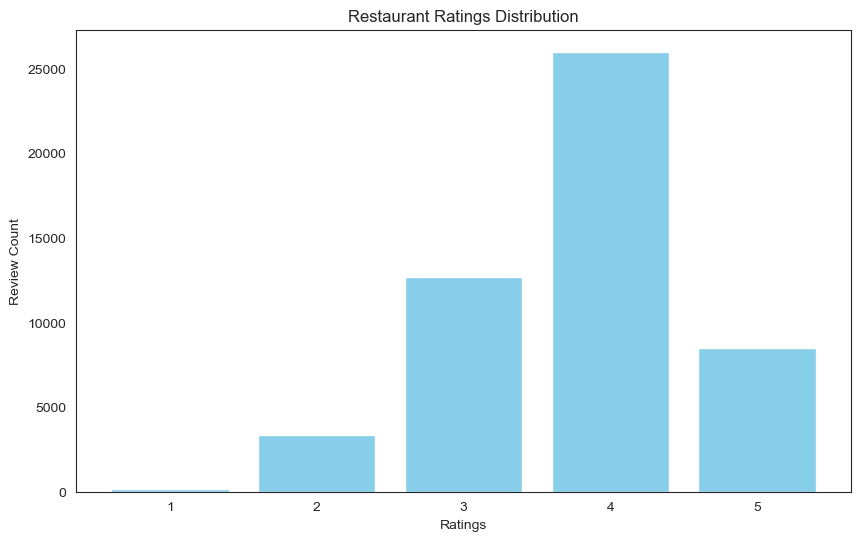

In [8]:
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
review_counts = [180, 3400, 12691, 25990, 8503]

plt.figure(figsize=(10, 6))
plt.bar(ratings, review_counts, color='skyblue')
plt.title('Restaurant Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Review Count')
plt.show()

In [9]:
business_data['city'].value_counts()

Portland         5730
Vancouver        5026
Austin           4958
Atlanta          4179
Orlando          3748
                 ... 
Niederwald          1
SURREY              1
CASSELBERRY         1
Miami Beach         1
ChampionsGate       1
Name: city, Length: 459, dtype: int64

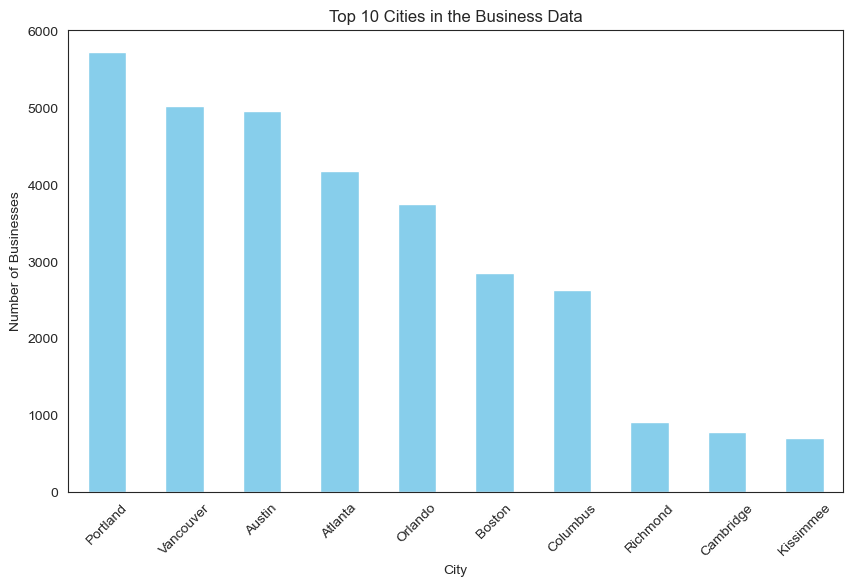

In [10]:
# Assuming business_data is your DataFrame with the 'city' column
city_counts = business_data['city'].value_counts()
top_20_cities = city_counts.head(10)

plt.figure(figsize=(10, 6))
top_20_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities in the Business Data')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.show()

In [11]:
top_10_categories = business_data['categories'].explode().value_counts().head(10)
top_10_categories

Nightlife                 8550
Bars                      8157
Sandwiches                7272
American (Traditional)    6541
Pizza                     5756
Breakfast & Brunch        5505
American (New)            5458
Fast Food                 5300
Burgers                   4445
Coffee & Tea              4391
Name: categories, dtype: int64

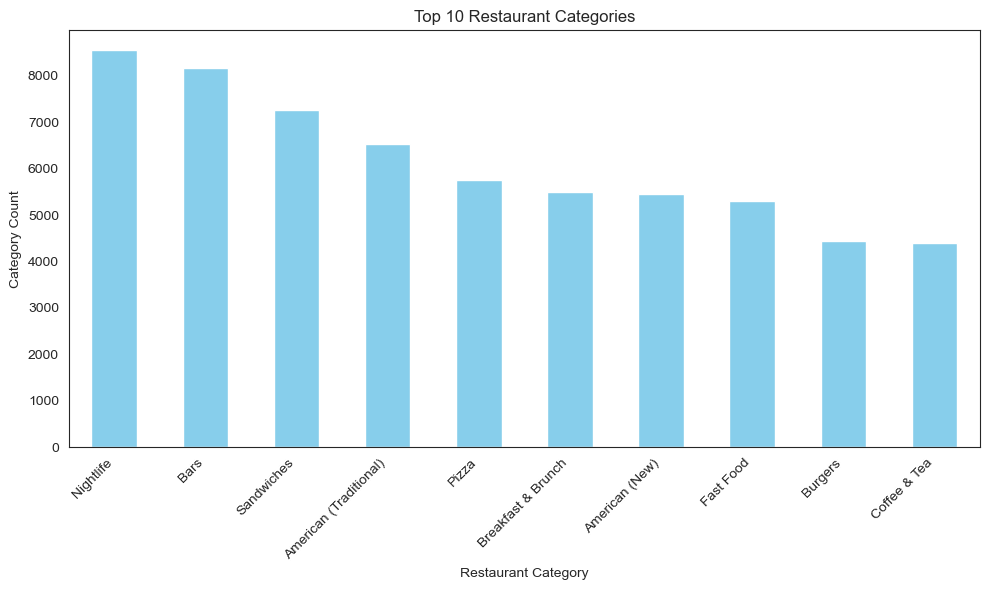

In [12]:
# Plot the bar graph
plt.figure(figsize=(10, 6)) 
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Categories')
plt.xlabel('Restaurant Category')
plt.ylabel('Category Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


The top 10 most reviewed restaurant categories are: `Nightlife`, `Bars`, `Sandwiches`, `American (Traditional)`, `Pizza`, `Breakfast & Brunch`, `American (New)`, `Fast Food`, `Burgers`, `Coffee & Tea`. 

In [13]:
print(f"The number of unique restaurant categories in our dataset is {business_data['categories'].explode().nunique()}.")

The number of unique restaurant categories in our dataset is 724.


In [14]:
print('The top 10 most reviewed restaurants in our dataset are as follows:')

business_data[['restaurant_name', 'city', 'state', 'restaurant_rating', 'restaurant_review_count']].sort_values(by='restaurant_review_count', ascending=False).head(10)

The top 10 most reviewed restaurants in our dataset are as follows:


,restaurant_name,city,state,restaurant_rating,restaurant_review_count
64048,Voodoo Doughnut - Old Town,Portland,OR,3.5,9185
113608,Mike's Pastry,Boston,MA,4.0,7298
42375,Screen Door,Portland,OR,4.5,7219
25571,Pok Pok,Portland,OR,4.0,6221
145385,Neptune Oyster,Boston,MA,4.5,5115
46678,Franklin Barbecue,Austin,TX,4.5,4942
24869,Moonshine Patio Bar & Grill,Austin,TX,4.5,4833
1850,Hopdoddy Burger Bar,Austin,TX,4.0,4708
97776,The Salt Lick BBQ,Driftwood,TX,4.0,4524
122853,Mother’s Bistro & Bar,Portland,OR,4.5,4466


C:\Users\Diane\AppData\Local\Temp\ipykernel_12880\3059209619.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(business_data['restaurant_review_count'])


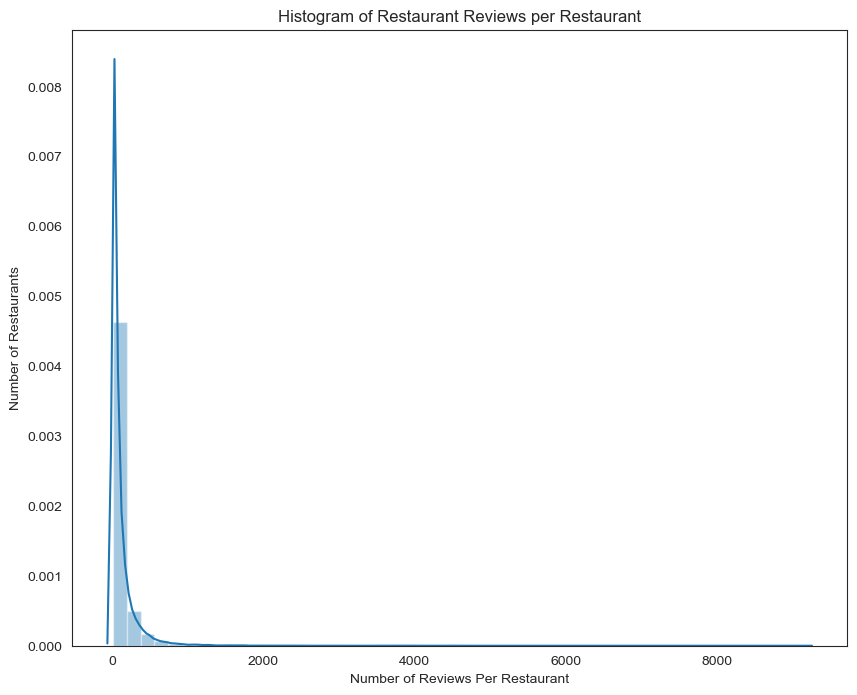

In [15]:
# Create a figure with the given size
plt.figure(figsize=(10, 8))

# Create a histogram of the 'review_count' column from the 'business_data' dataframe
sns.distplot(business_data['restaurant_review_count'])

# Set the title, x-axis label, and y-axis label
plt.title('Histogram of Restaurant Reviews per Restaurant')
plt.xlabel('Number of Reviews Per Restaurant')
plt.ylabel('Number of Restaurants')

# Display the plot
plt.show()

### Review Data Exploratory Analysis <a class="anchor" id="review"></a>

**Data Dictionary:**
* `review_id`: unique review id
* `user_id`: unique user id
* `business_id`: unique user id
* `stars`: star rating
* `text`: the review itself
* `rating_type`: 0 or 1 for negative or positive review 

In [16]:
# Load the pickled review_data DataFrame
review_data = pd.read_pickle('C:/Users/Diane/Desktop/Brainstation_Capstone/yelp_data/review_data.pkl')

In [17]:
review_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'text'], dtype='object')

In [18]:
# Print a concise summary of a DataFrame
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8635401 entries, 0 to 8635402
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   text         object 
dtypes: float64(1), object(4)
memory usage: 395.3+ MB


In [19]:
# Displaying the first few rows to get an initial glimpse of the data
review_data.head()

,review_id,user_id,business_id,stars,text
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,Apparently Prides Osteria had a rough summer a...
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,This store is pretty good. Not as great as Wal...
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,I called WVM on the recommendation of a couple...
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,I've stayed at many Marriott and Renaissance M...
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,The food is always great here. The service fro...


In [20]:
print(f"The review dataset has a total of {(review_data.shape)[0]} review entries.")

The review dataset has a total of 8635401 review entries.


In [21]:
review_counts = review_data['stars'].value_counts().sort_values()
review_counts

2.0     711378
3.0     926655
1.0    1262799
4.0    1920037
5.0    3814532
Name: stars, dtype: int64

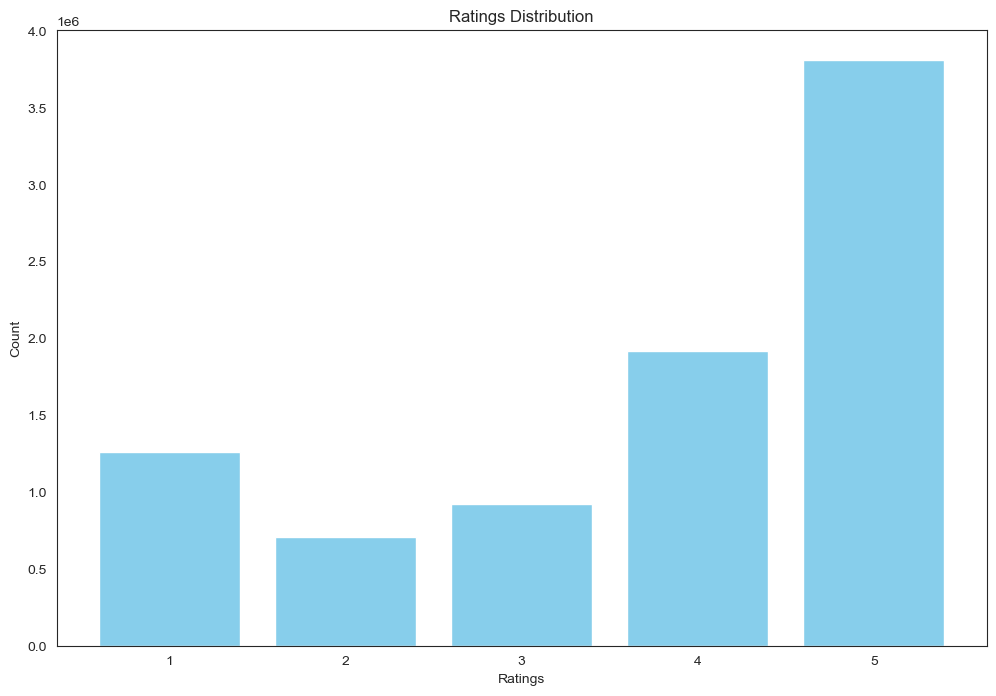

In [22]:
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
review_counts = [1262799, 711378, 926655, 1920037, 3814532]

plt.figure(figsize=(12, 8))
plt.bar(ratings, review_counts, color='skyblue')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

**Sentiment Analysis**

In [23]:
review_data['rating_type'] = np.where(review_data['stars'] >= 4, 1, 0)
review_data['rating_type'].value_counts()

1    5734569
0    2900832
Name: rating_type, dtype: int64

In [24]:
# Get a random sample of 1% of the rows from the DataFrame
random_sample = review_data.sample(frac=0.01, random_state=42)

# Display the random sample
display(random_sample)

,review_id,user_id,business_id,stars,text,rating_type
5932453,Is7-0uDV6nDH1fHAOTmw-A,dGUszeSkbVHhPkqgpKBmBA,AyoFLxUrGveYckC5Zj7tDA,3.0,"Not a horrible hotel, but definitely needs an ...",0
493615,1aUO4vSIoKBAW3kEUwutBg,snHMo74cwRi7LFnZEnwCYQ,qDyZQ6mT1JajQ7_Yj7PeLw,4.0,Small place and gets crowded quick but overall...,1
6259232,VLptQ8fM5QraIC7w5dNbBA,z206zAkTprhznyFYq_1tlQ,Go8U9oJd4CfpO1ik4Z8iKA,3.0,"Could be a great spot, but based on one visit ...",0
1489918,4B1XWjBbougk7RdGtDPBbA,5KcOartap5i6_CoC9pf5bA,ZRubp7P36r5dUqyuNLFndg,5.0,"Men's Place is a chill, tasteful environment t...",1
1304179,0zy2y0psMIu1y2tD58RNIg,4jKdRw3wYpn7eUYnqbvNfw,S3aTZhPs9-7O4c6uIt6yiA,5.0,excellent mango bingsoo.\nthis might be the mo...,1
...,...,...,...,...,...,...
4503844,2bWXEksPmfmby-NtDoFTSg,3mRKMdq5DBbTLOUoTLY7CA,zTD-vYOkXrZTZmoabUIKMg,1.0,My previous car spent a lot of time here. Not ...,0
8534390,U_adQGKEtp4TPPg1Vcp7Sg,L3gKNbpy43wVn_QfIPt3rQ,0OLnSNxQeKrxGmWaehy4LQ,1.0,I've been taking my dogs to Woodstock VCA for ...,0
2936330,CqXXKVqh4_zB1LMWRoY40w,syAGtRgmNFhd4wWLpxa0aw,88TlAPCLtzA5oHFVVGSfHg,5.0,This experience far exceeded my expectations. ...,1
8418976,LasP3FmaJmTAFepxDVXdNA,QbIuQLtDY3bXZZNHHd9eKg,TAjYgTIHX_Kl6wfQZAEniA,4.0,I am very satisfied with the product. It was a...,1


Splitting `review_data` based on whether the rating is negative or positive. Star ratings that are 3 or lower will be marked as a negative review, and the remainder of ratings that are 4 or higher will be considered a positive review. 

In [25]:
# Splitting the DataFrame into negative and positive DataFrames
negative = random_sample[random_sample['rating_type'] == 0]
positive = random_sample[random_sample['rating_type'] == 1]

# Dropping the 'rating_type' column from both DataFrames
negative = negative.drop('rating_type', axis=1)
positive = positive.drop('rating_type', axis=1)

In [26]:
# Displaying the first few rows to get an initial glimpse of the data
negative.head()

,review_id,user_id,business_id,stars,text
5932453,Is7-0uDV6nDH1fHAOTmw-A,dGUszeSkbVHhPkqgpKBmBA,AyoFLxUrGveYckC5Zj7tDA,3.0,"Not a horrible hotel, but definitely needs an ..."
6259232,VLptQ8fM5QraIC7w5dNbBA,z206zAkTprhznyFYq_1tlQ,Go8U9oJd4CfpO1ik4Z8iKA,3.0,"Could be a great spot, but based on one visit ..."
6274992,stu_Oztl_w-ARQgUboGs1g,tCAMFOyUIV9Ltc88ZzBeZw,SAAHL_pL7fFxeogJIVLQBQ,2.0,When we arrived the hotel was overbooked. We c...
7823880,DvVodqfBTfcKBzz_2SbZlg,nVkYhIH0vi63Pua0ab2j8g,8HHjwYYxm_GZcDQOB95CNQ,3.0,"Good selection but super expensive! \n\nThis ""..."
7438030,ykE-9AjoD309g7BYtIOn6g,A_PWwxYtPnQn8vCe4YSEjQ,9Su325kUCQ1ZglXS-G_7ZA,3.0,I've been here twice now and it has a pretty g...


In [27]:
# Displaying the first few rows to get an initial glimpse of the data
positive.head()

,review_id,user_id,business_id,stars,text
493615,1aUO4vSIoKBAW3kEUwutBg,snHMo74cwRi7LFnZEnwCYQ,qDyZQ6mT1JajQ7_Yj7PeLw,4.0,Small place and gets crowded quick but overall...
1489918,4B1XWjBbougk7RdGtDPBbA,5KcOartap5i6_CoC9pf5bA,ZRubp7P36r5dUqyuNLFndg,5.0,"Men's Place is a chill, tasteful environment t..."
1304179,0zy2y0psMIu1y2tD58RNIg,4jKdRw3wYpn7eUYnqbvNfw,S3aTZhPs9-7O4c6uIt6yiA,5.0,excellent mango bingsoo.\nthis might be the mo...
7903109,DkU1fmg-Ml9ynKOs1djOig,tz3FeJiWavlx6N9sMjIsXA,1U66rBiZ-VHMkbgylDF0Sw,4.0,"We were staying with friends, we needed dinner..."
3309241,BKErBOXKYjmoV0cwL513ZA,CyzpdlVkE-TL0OemYPWQyw,d9a-UvsOMLUTDwIHj1OtzA,5.0,First time at Mario's was great; the inspectio...


By building a tokenizer, we can process our review text data. The `tokenizer` will remove punctuation, set to lowercase, split into words, and remove blanks and stop word. 

In [29]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

ENGLISH_STOP_WORDS = stopwords.words('english')
stemmer = PorterStemmer() 

def tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

**Count Vectorizer Method**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag-of-words representation 
negative_vec = CountVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(negative['text'])
negative_transformed = negative_vec.transform(negative['text'])

# Display the sparse matrix with the bag-of-words representation
negative_features = pd.DataFrame(columns=negative_vec.get_feature_names_out(), data=negative_transformed.toarray())
display(negative_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\n4,\n\na,\n\nafter,\n\nagain,\n\nall,...,yr,yuck,yum,yummi,zero,zip,zone,zoo,zucchini,‍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tokenizing our `positive` reviews dataframe. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the bag-of-words representation 
positive_vec = CountVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(positive['text'])
positive_transformed = positive_vec.transform(positive['text'])

# Display the sparse matrix with the bag-of-words representation
positive_features = pd.DataFrame(columns=positive_vec.get_feature_names_out(), data=positive_transformed.toarray())
display(positive_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\na,\n\nafter,\n\nall,\n\nalso,\n\nand,...,yup,yuzu,z,zach,zen,zero,zombi,zone,zoo,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57207,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Plotting the top 20 **negative** tokens. 

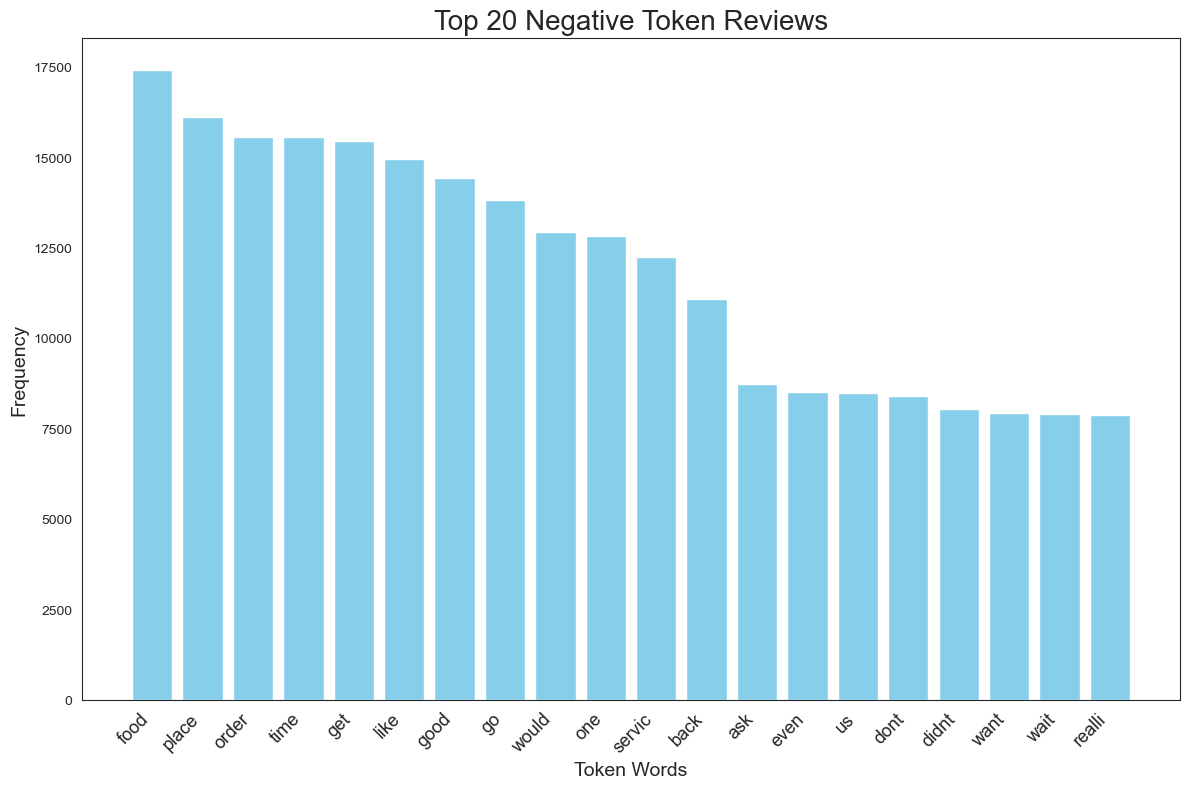

In [41]:
# Sum the one hot encoded values for each token to get its frequency
negative_token_frequencies = negative_features.sum()

# Get the top 20 token words and their frequencies for plotting
top_20_tokens = negative_token_frequencies.nlargest(20)
token_words = top_20_tokens.index
frequencies = top_20_tokens.values

# Create the bar graph for the top 20 tokens
plt.figure(figsize=(12, 8))
plt.bar(token_words, frequencies, color='skyblue')
plt.title('Top 20 Negative Token Reviews', fontsize=20)
plt.xlabel('Token Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=13) 
plt.tight_layout()
plt.show()

Plotting the top 20 **positive** tokens. 

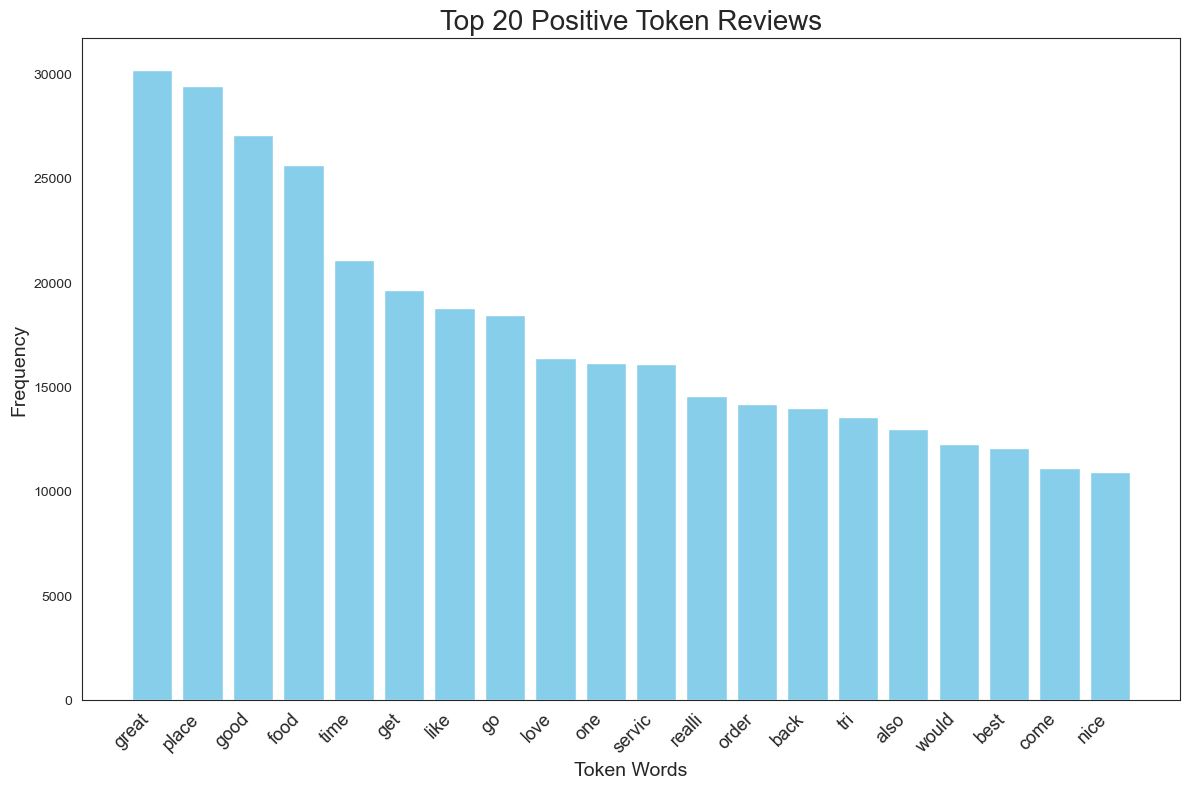

In [42]:
# Sum the one hot encoded values for each token to get its frequency
positive_token_frequencies = positive_features.sum()

# Get the top 20 token words and their frequencies for plotting
top_20_tokens = positive_token_frequencies.nlargest(20)
token_words = top_20_tokens.index
frequencies = top_20_tokens.values

# Create the bar graph for the top 20 tokens
plt.figure(figsize=(12, 8))
plt.bar(token_words, frequencies, color='skyblue')
plt.title('Top 20 Positive Token Reviews', fontsize=20)  
plt.xlabel('Token Words', fontsize=14)  
plt.ylabel('Frequency', fontsize=14) 
plt.xticks(rotation=45, ha='right', fontsize=13) 
plt.tight_layout()
plt.show()

**TF-IDF Method**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF representation
negative_vec = TfidfVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(negative['text'])
negative_transformed = negative_vec.transform(negative['text'])

# Display the sparse matrix with the TF-IDF representation
negative_features = pd.DataFrame(columns=negative_vec.get_feature_names_out(), data=negative_transformed.toarray())
display(negative_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\n4,\n\na,\n\nafter,\n\nagain,\n\nall,...,yr,yuck,yum,yummi,zero,zip,zone,zoo,zucchini,‍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
negative_transformed.shape

(29142, 5000)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF representation for the positive data
positive_vec = TfidfVectorizer(tokenizer=tokenizer, min_df=20, max_features=5000).fit(positive['text'])
positive_transformed = positive_vec.transform(positive['text'])

# Display the sparse matrix with the TF-IDF representation for the positive data
positive_features = pd.DataFrame(columns=positive_vec.get_feature_names_out(), data=positive_transformed.toarray())
display(positive_features)

,\n,\n\n,\n\n1,\n\n2,\n\n3,\n\na,\n\nafter,\n\nall,\n\nalso,\n\nand,...,yup,yuzu,z,zach,zen,zero,zombi,zone,zoo,zucchini
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57207,0.0,0.234971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57208,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57209,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57210,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
positive_transformed.shape

(57212, 5000)

### User Data Exploratory Analysis <a class="anchor" id="user"></a>

**Data Dictionary:**
* `user_id`: unique user id
* `user_name`: the user's first name
* `average_stars`: average rating of all reviews

In [47]:
# Load the pickled DataFrame
user_data = pd.read_pickle('C:/Users/Diane/Desktop/Brainstation_Capstone/yelp_data/user_data.pkl')

In [48]:
# Print a concise summary of a DataFrame
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189451 entries, 0 to 2189456
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   user_id            object 
 1   name               object 
 2   user_review_count  int64  
 3   average_stars      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.5+ MB


In [49]:
# Displaying the first few rows to get an initial glimpse of the data
user_data.head()

,user_id,name,user_review_count,average_stars
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,3.85
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,4.09
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,3.76
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,3.77
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,3.72


In [50]:
print(f"The user dataset has a total of {user_data['user_id'].nunique()} unique user entries.")

The user dataset has a total of 2189451 unique user entries.
